### Implementing Exponential Search and Fibonacci Search

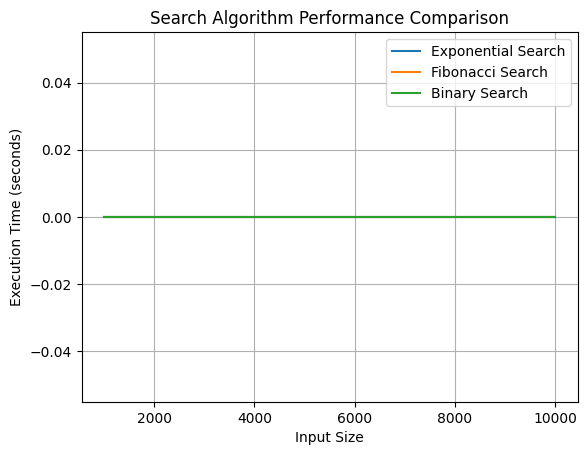

In [1]:
import time
import random
import matplotlib.pyplot as plt

def binary_search(arr, left, right, target):
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def exponential_search(arr, target):
    if arr[0] == target:
        return 0
    i = 1
    while i < len(arr) and arr[i] <= target:
        i *= 2
    return binary_search(arr, i // 2, min(i, len(arr) - 1), target)

def fibonacci_search(arr, target):
    n = len(arr)
    fib2 = 0
    fib1 = 1
    fib = fib1 + fib2
    while fib < n:
        fib2 = fib1
        fib1 = fib
        fib = fib1 + fib2
    offset = -1
    while fib > 1:
        i = min(offset + fib2, n - 1)
        if arr[i] < target:
            fib = fib1
            fib1 = fib2
            fib2 = fib - fib1
            offset = i
        elif arr[i] > target:
            fib = fib2
            fib1 = fib1 - fib2
            fib2 = fib - fib1
        else:
            return i
    if fib1 and offset + 1 < n and arr[offset + 1] == target:
        return offset + 1
    return -1

sizes = [1000, 5000, 10000]
exp_times = []
fib_times = []
bin_times = []

for size in sizes:
    arr = sorted(random.sample(range(1, size * 10), size))
    target = random.choice(arr)

    start = time.time()
    exponential_search(arr, target)
    exp_times.append(time.time() - start)

    start = time.time()
    fibonacci_search(arr, target)
    fib_times.append(time.time() - start)

    start = time.time()
    binary_search(arr, 0, len(arr) - 1, target)
    bin_times.append(time.time() - start)

plt.plot(sizes, exp_times, label='Exponential Search')
plt.plot(sizes, fib_times, label='Fibonacci Search')
plt.plot(sizes, bin_times, label='Binary Search')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Search Algorithm Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()
